# Pauta Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [3]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

Warning message:
"package 'kohonen' was built under R version 3.6.2"


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

[[1]]
        WATER    PROTEIN        FAT    LACTOSE        ASH
V1 -2.5222239  1.0528329  2.7425762 -2.0601118 -0.2716036
V2 -0.5811132 -0.7144007  0.6899900  0.8015036 -0.4607760
V3 -0.7041543  1.1641588  0.5601739 -0.8912038  1.3564629
V4  0.6587507 -0.6358559 -0.6041291  0.5603367 -0.5424493

 [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 3 3 3 3 1 1


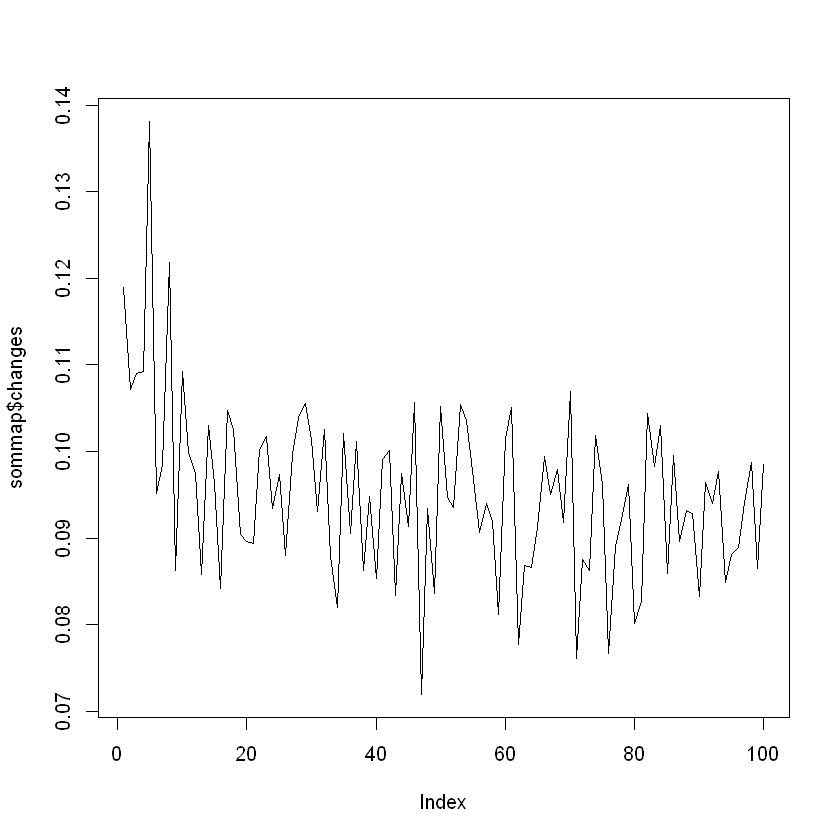

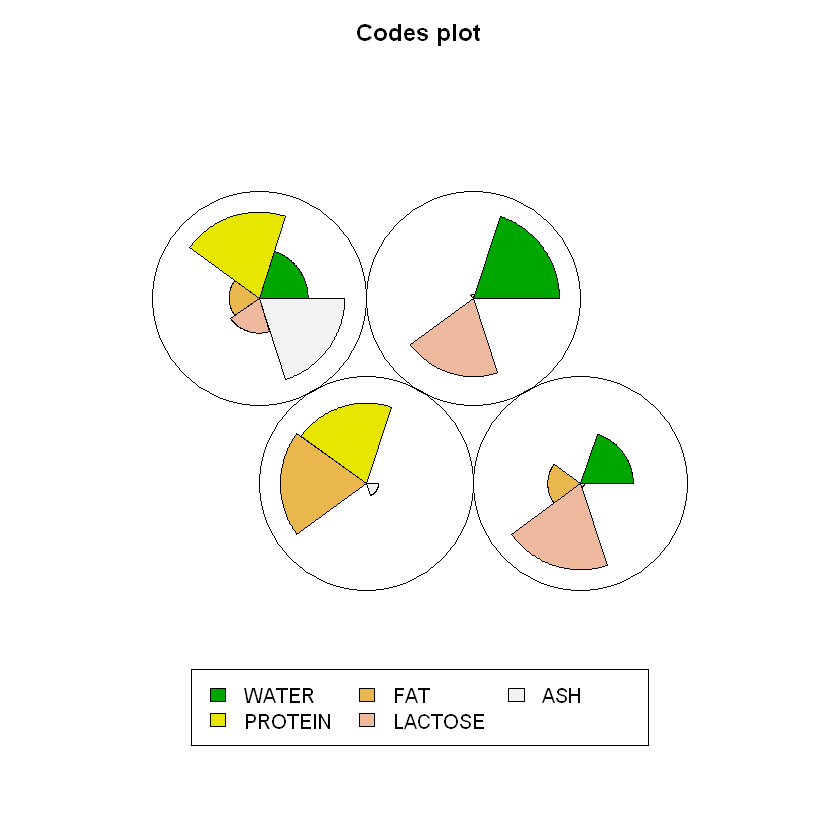

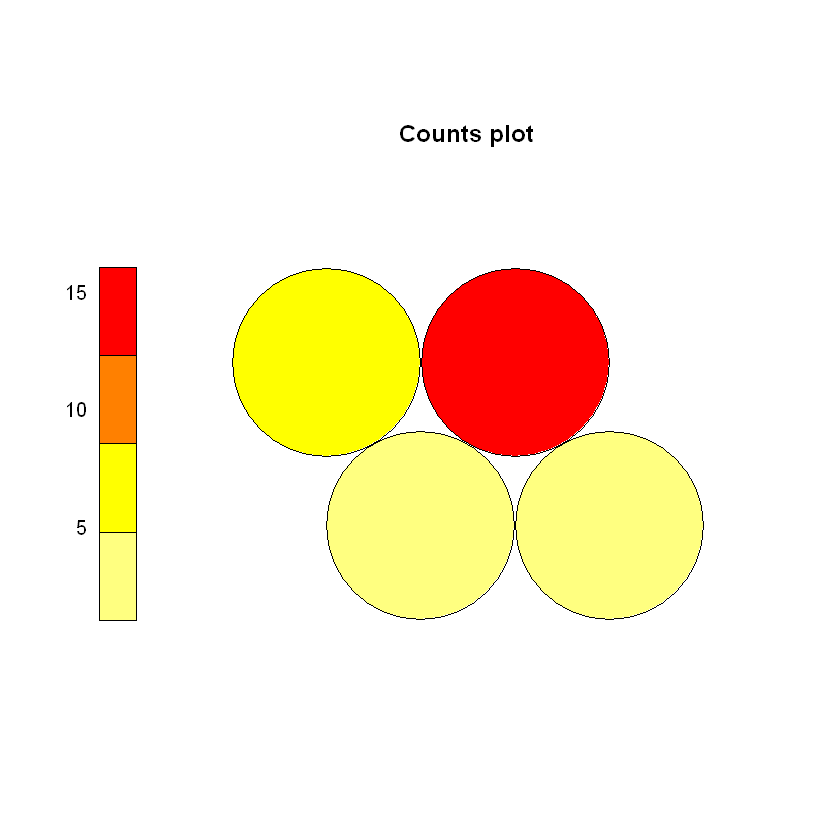

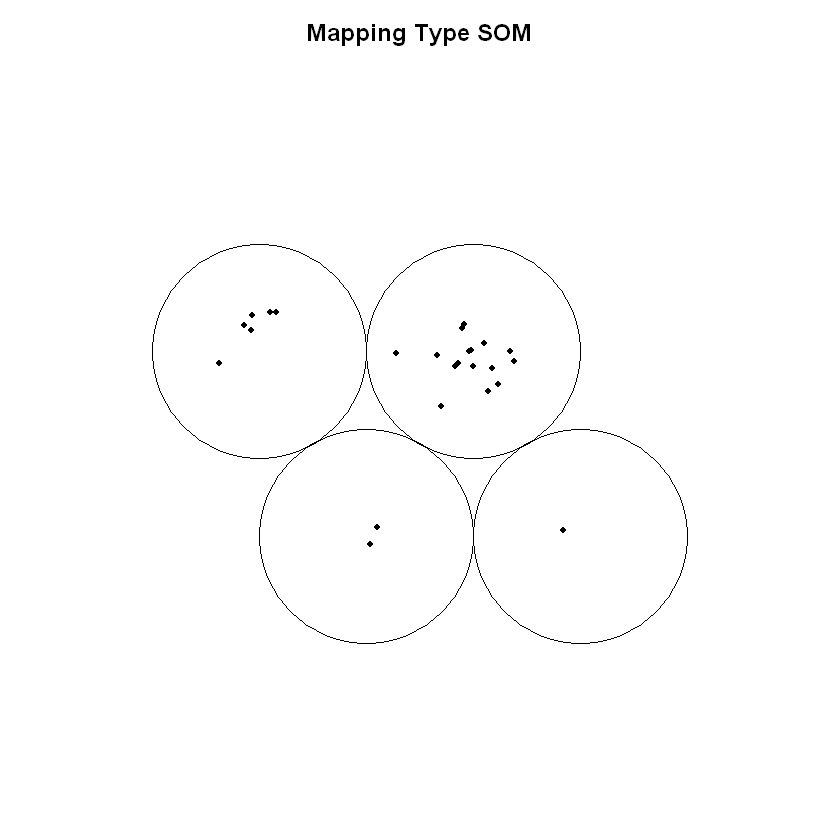

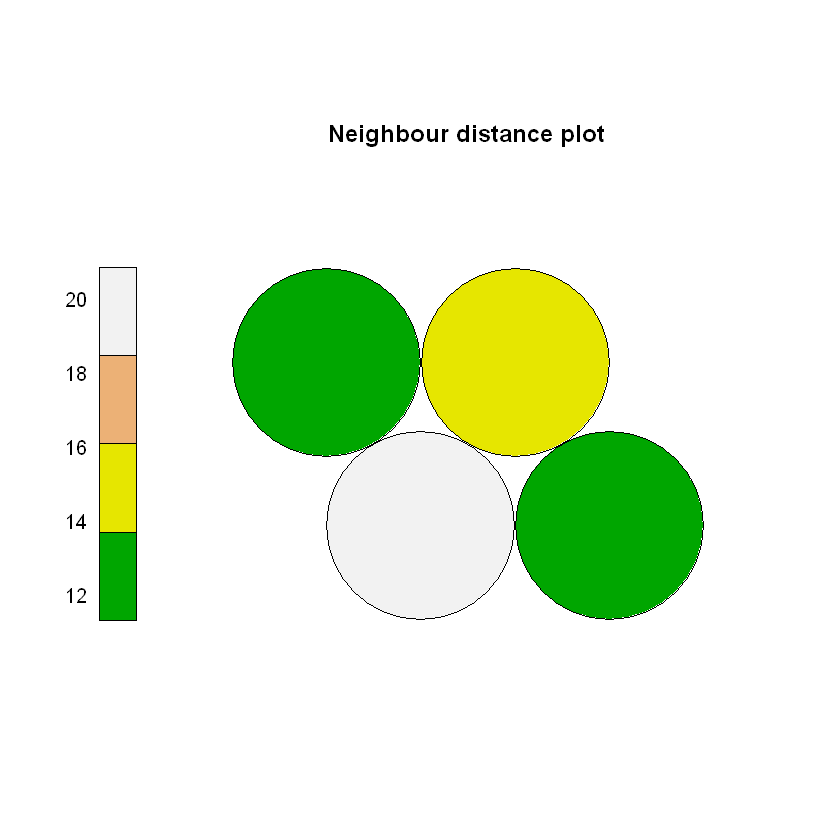

In [15]:
#create SOM grid
sommap <- som(scale(datos),rlen=100, grid = somgrid(2, 2, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.


b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

**Respuesta** 
**(a)**
El método som ajusta una red neuronal pre-alimentada, cuya salida es un mapa característico en 2D (compuesto de una malla de nodos)y la entradas son datos de alta dimensionalidad. Para ello utiliza el algoritmo de autoorganización de kohonen y la distancia euclidiana entre los nodos del mapa característico.
Los principales parámetros del método son:
- data: matriz en que cada fila representa una observación
- grid: el tipo de malla en el mapa característico
- rlen: el número de veces que el conjunto entero de datos es utilizado para ajustar la red neuronal. Por omisión es 100.
- alpha: tasa de aprendizaje, vector con el rango en cual variar linealmente la tasa de aprendizaje
- radius: radio de activación 
- init: valores iniciales de los pesos de la red. Por omisión se escogen aleatorios en el rango de los datos.

La salida es un objeto de la clase kohonen, cuyas principales componentes son:
   
- grid: la malla, un objeto de la clase "somgrid".
- codes: una matriz con los pesos de  cada nodo del mapa caracerístico
- changes: un vector con la media de las distancias entre nodos vecinos en cada iteración. Representan una medida del ajuste de la red. 
- unit.classif: nodos activados por cada observación. Sólo se retorna si keep.data == TRUE.
- distances: distancia de la observación al nodo activado.  Sólo se retorna si keep.data == TRUE.


Los gráficos desplegados muestra respectivamente:
1) los pesos de cada variable en los nodos (codes)
2) el número de observaciones por nodo (el nodo que se activa con dicha observación)
3) el lugar dónde se ubican las distintas observaciones respecto de cada nodo en el mapa característico
4) la distancia entre nodos del mapa  característico

**(b)** Es posible graficar changes, variando el valor de rlen y podemos ver que en este caso se logra convergencia con 150 iteraciones.
Distintas configuraciones del mapa, representan mas o menos grupos a definir.

[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1  0.7905985 -0.9725721 -0.7073171  0.82212272 -0.69727888
V2 -2.5345591  1.0705557  2.6964140 -2.02515813 -0.32354853
V3 -0.8114525  1.2594141  0.6789282 -0.96694402  1.56923432
V4  0.1127523  0.1719135 -0.1670428  0.04616112  0.02380488

 [1] 1 1 1 1 1 1 1 4 4 4 4 1 1 4 1 4 4 4 3 3 3 3 3 2 2


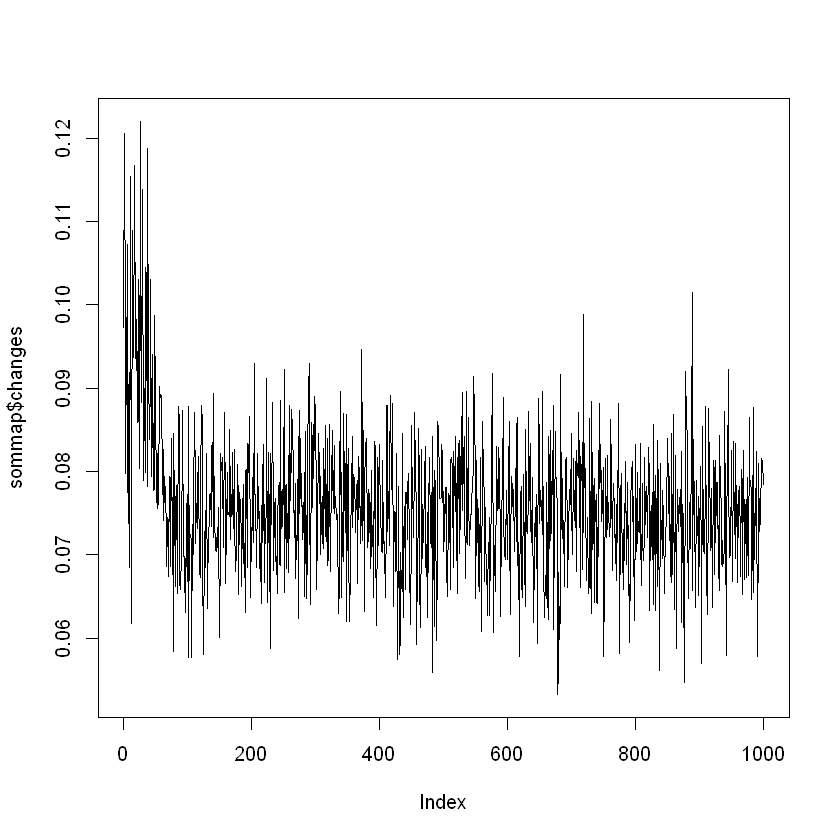

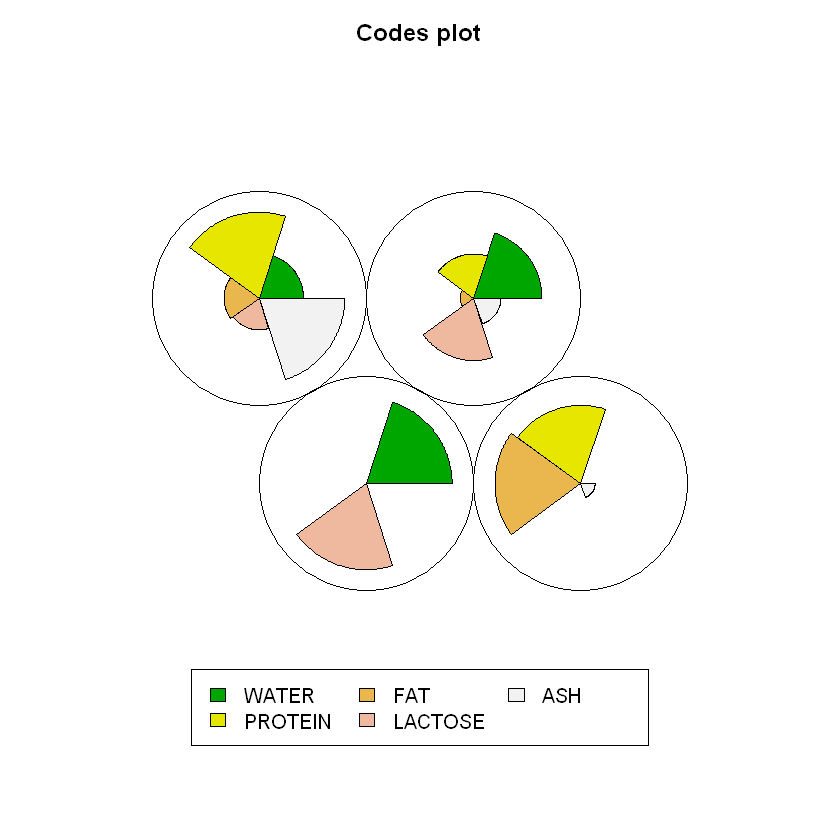

In [20]:
##create SOM grid
sommap <- som(scale(datos),rlen=1000, grid = somgrid(2, 2, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)



[[1]]
         WATER     PROTEIN         FAT    LACTOSE         ASH
V1  -0.2868491  0.83252076  0.06223193 -0.5406959  0.85407558
V2   0.3068267  0.54355288 -0.39448729 -0.2789105  0.08214617
V3   0.2819321 -0.02914296 -0.39558656  0.3652689  0.11273417
V4   0.6649037 -0.50566676 -0.74948166  0.8295910 -0.02284006
V5  -0.5462417  1.66075897  0.27936774 -1.2211941  2.82431640
V6  -0.2603343  0.56206747  0.19452270 -0.3102877  0.47905198
V7   0.3054375 -0.08537407 -0.22896088  0.3099623 -0.16474116
V8   0.6813744 -0.81387927 -0.58736902  0.5069978 -0.31380140
V9  -1.0197324  1.24094734  0.96156727 -1.0350860  1.25652203
V10 -0.5828540 -0.71393338  0.69209845  0.8002870 -0.46097625
V11  0.9197217 -1.15180051 -0.80675419  0.7470391 -0.77897861
V12  0.9529562 -1.53561230 -0.55274481  0.1476632 -1.51023149
V13 -2.5351759  1.07185575  2.69285204 -2.0225656 -0.32689215
V14 -1.6272464  0.56089370  1.69492012 -0.9081551 -0.10340842
V15  0.6179949 -1.13944768 -0.46843785  0.9323034 -1.03954574
V1

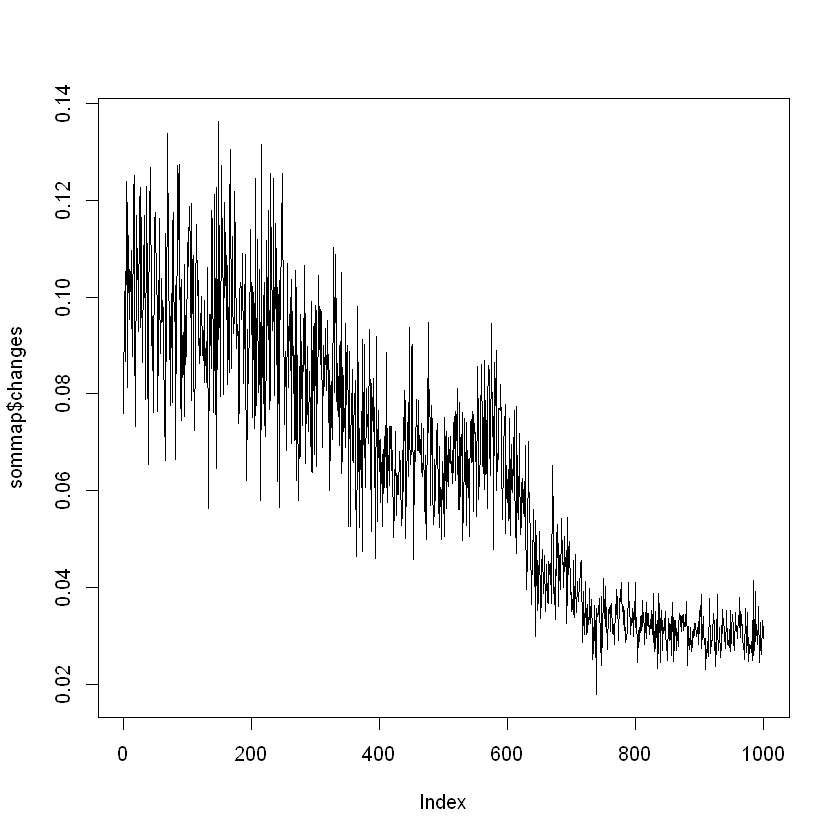

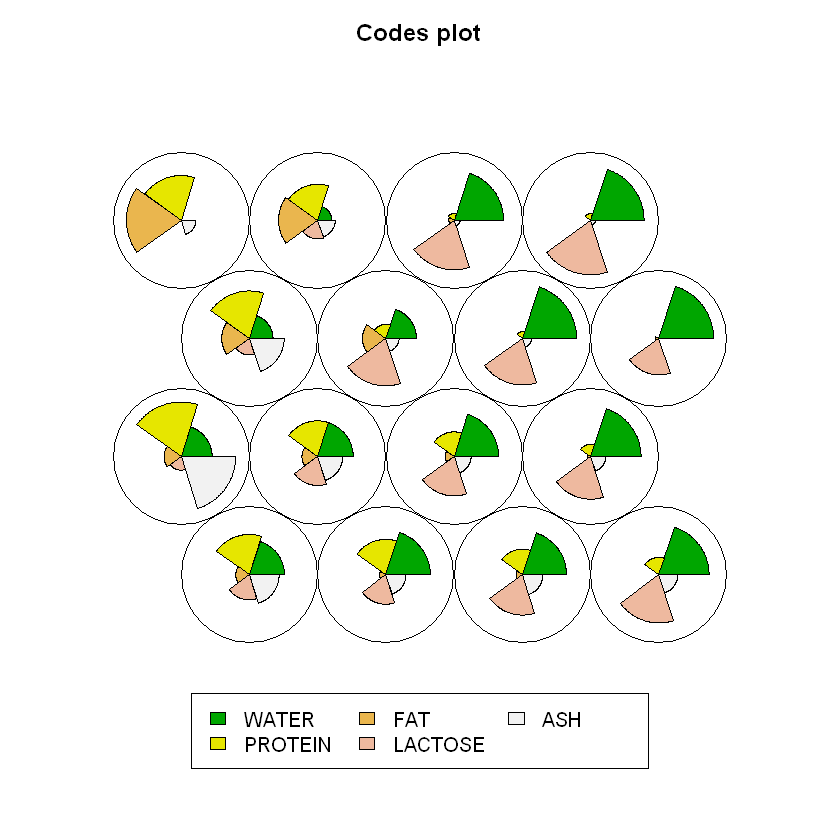

In [27]:
sommap <- som(scale(datos),rlen=1000, grid = somgrid(4,4, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

            [,1]        [,2]        [,3]       [,4]        [,5]
 [1,] -0.2868491  0.83252076  0.06223193 -0.5406959  0.85407558
 [2,]  0.3068267  0.54355288 -0.39448729 -0.2789105  0.08214617
 [3,]  0.2819321 -0.02914296 -0.39558656  0.3652689  0.11273417
 [4,]  0.6649037 -0.50566676 -0.74948166  0.8295910 -0.02284006
 [5,] -0.5462417  1.66075897  0.27936774 -1.2211941  2.82431640
 [6,] -0.2603343  0.56206747  0.19452270 -0.3102877  0.47905198
 [7,]  0.3054375 -0.08537407 -0.22896088  0.3099623 -0.16474116
 [8,]  0.6813744 -0.81387927 -0.58736902  0.5069978 -0.31380140
 [9,] -1.0197324  1.24094734  0.96156727 -1.0350860  1.25652203
[10,] -0.5828540 -0.71393338  0.69209845  0.8002870 -0.46097625
[11,]  0.9197217 -1.15180051 -0.80675419  0.7470391 -0.77897861
[12,]  0.9529562 -1.53561230 -0.55274481  0.1476632 -1.51023149
[13,] -2.5351759  1.07185575  2.69285204 -2.0225656 -0.32689215
[14,] -1.6272464  0.56089370  1.69492012 -0.9081551 -0.10340842
[15,]  0.6179949 -1.13944768 -0.46843785

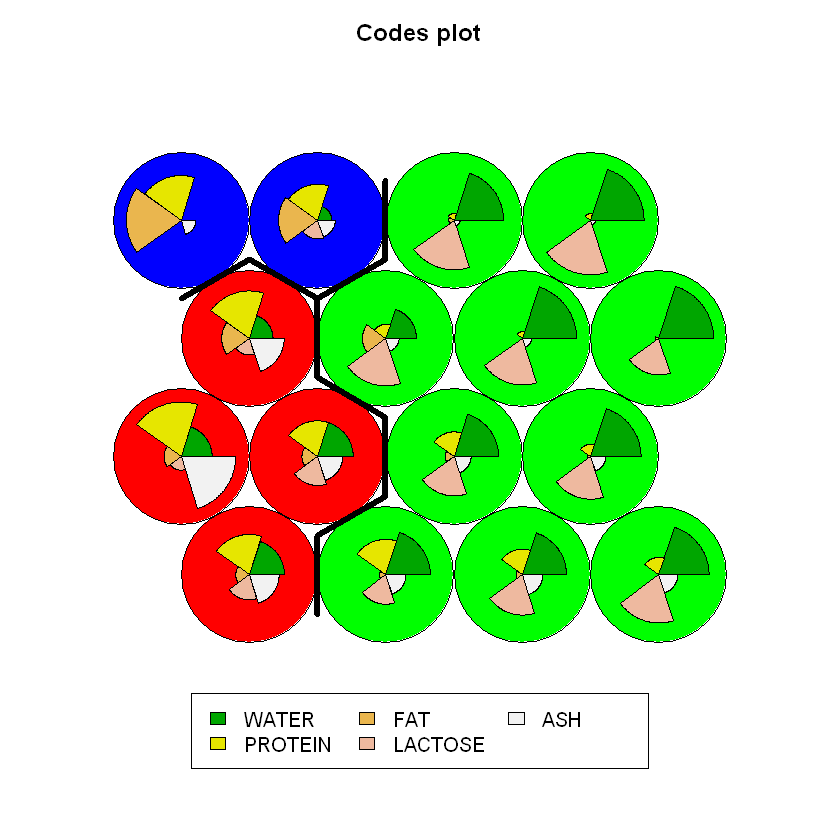

In [33]:
mat <- matrix(sommap$codes[[1]],nrow=16,ncol=5)
print(mat)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)
print(som.hc)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

**Respuesta**
**(a)** Esta visualización es útil cuando se ha generado un mapa característico con muchos nodos y se quiere recuperar un agrupamiento con menor número de grupos.
**(b)** En el caso del ejemplo, si utilizamos 3 grupos, se recuperan las características de los mismos grupos logrados con los otros métodos.

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.

**Respuesta** 
**(a)** Utilizaremos el conjunto Iris, que nos permite contrastar el agrupamiento con los grupos naturales de las 3 especies.
**(b)** Se concluye, que con los parámetros utilizados, SOM no supera el poder predictivo de los otros métodos.


  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :50  
 Versicolor:50  
 Virginica :50  
                
                
                

[1] 150   5

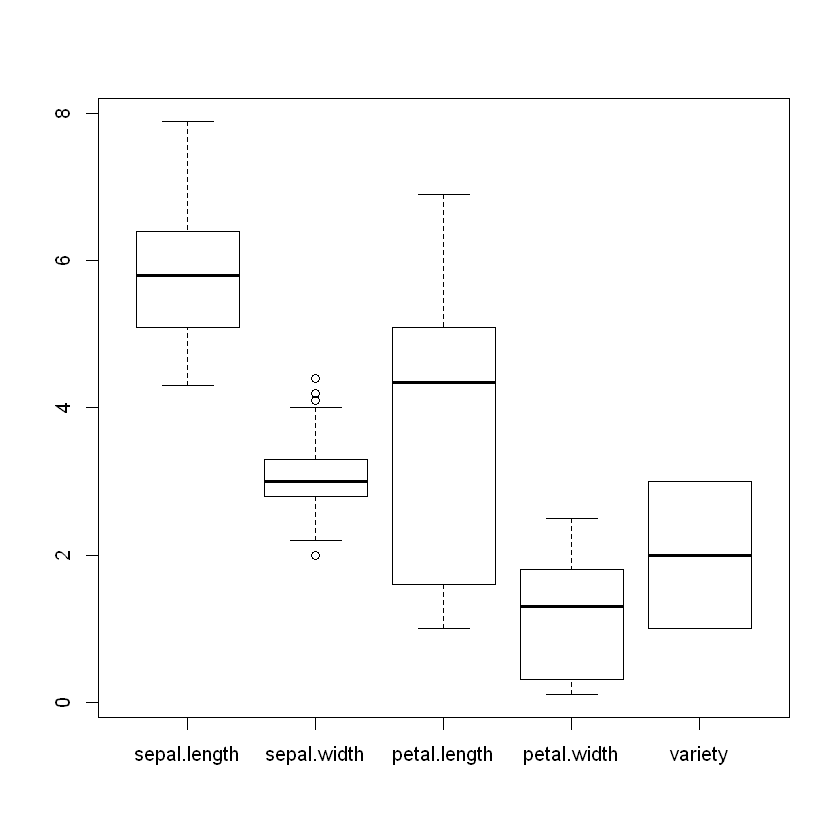

In [34]:
datos1 <-read.table("iris.csv",sep=";",dec=",",header=TRUE)
summary(datos1)
boxplot(datos1)
dim(datos1)


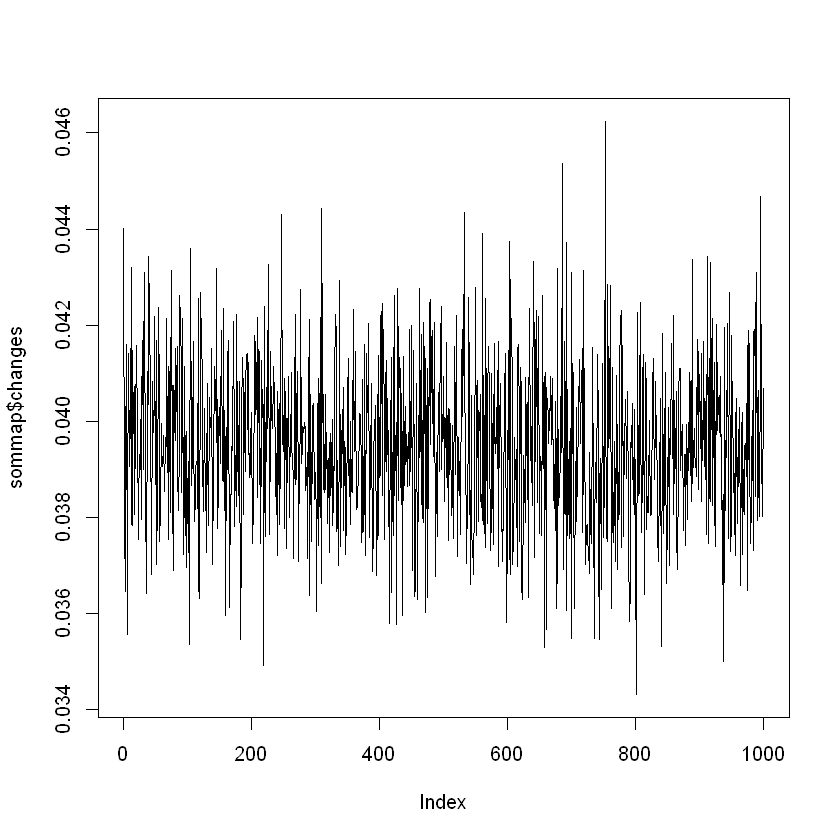

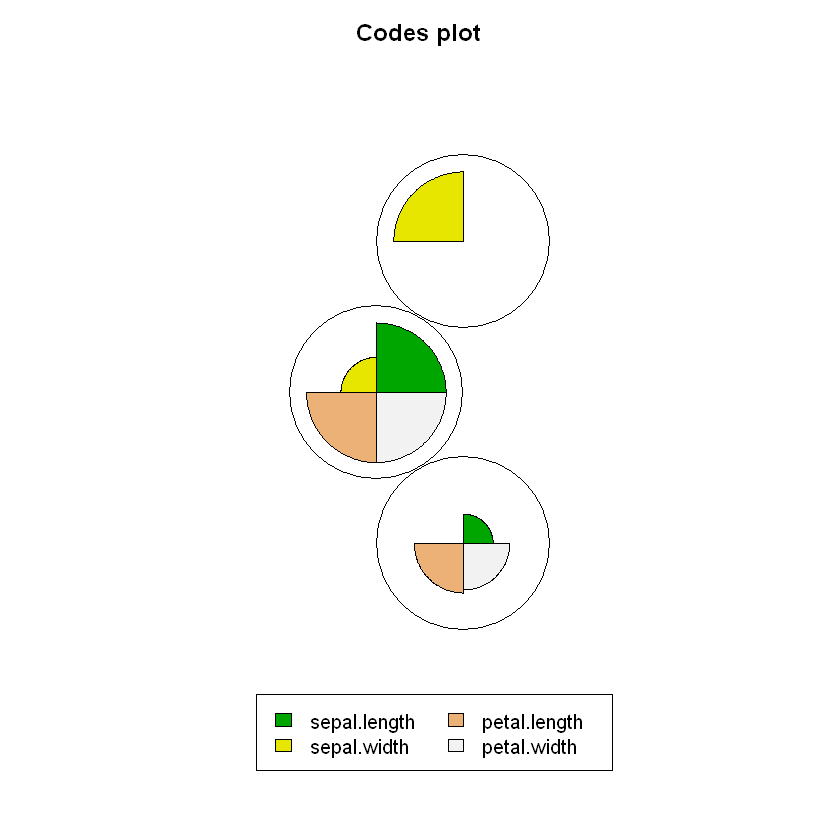

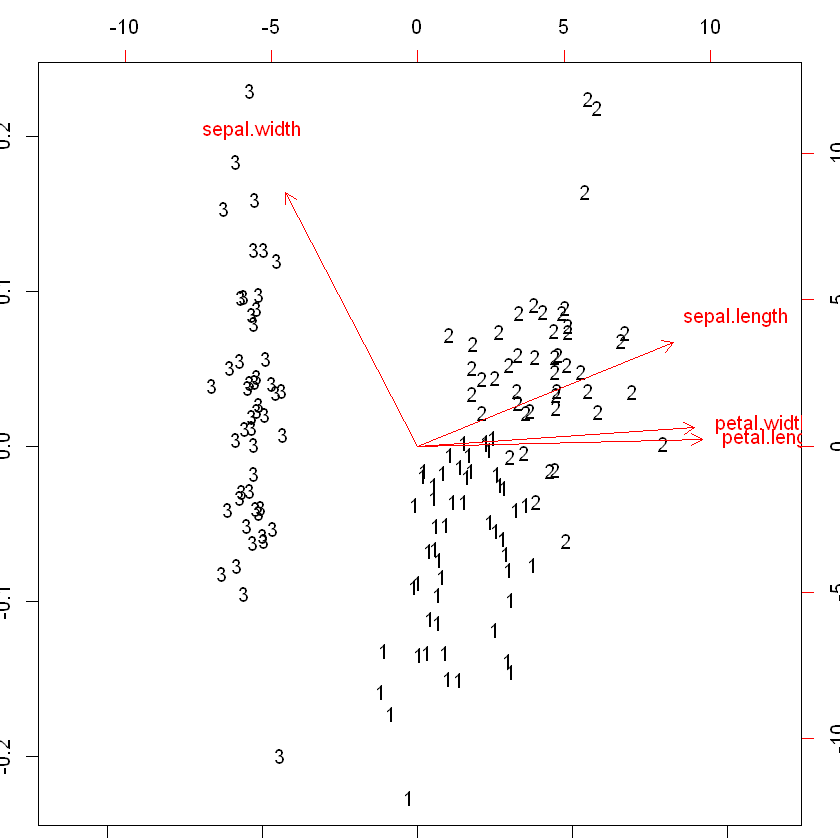

In [42]:
datos <- datos1[,1:4]
#agrupamiento con kmeans 

k0=3
sommap <- som(scale(datos),rlen=1000, grid = somgrid(1,3, "hexagonal"), keep.data=TRUE)



plot(sommap$changes, type="l")
clases <- sommap$unit.classif
plot(sommap)

res <- princomp(datos, cor=TRUE)

biplot(res,xlabs=clases)


In [52]:
library(caret)
print(clases)
vector <- as.factor(c(rep(3,50),rep(1,50),rep(2,50)))
cm1 <- confusionMatrix(data = as.factor(clases), reference = vector)
print(cm1$table)


  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 [75] 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1
          Reference
Prediction  1  2  3
         1 39 15  0
         2 11 35  0
         3  0  0 50


In [54]:
library(c2c)
p1 <- overall_purity(cm1$table)
print(p1)

[1] 0.8266667
